# Biological and Artificial Neuron

- Perceptron is inspired by the biological neuron cell of nerve system, and the idea is explored over many classification problems.
- In this note, we will establish the concept of perceptron by looking at the biological neuron model.
- We will overlook a brief implementation of perceptron.

## Biological Neural System

![Neuron](https://upload.wikimedia.org/wikipedia/commons/b/bd/Neuron.jpg)

The basic operation of the neuron is following:
1. Recieve the electrical signal at dendrites.
2. Signals gather in the cell body, create an electrical potential.
3. If the potential is enough to overcome the myelin sheath's potential, signal pass through.
4. Signal exit through axon terminal, and pass to the next connected neurons.

As a series of signals pass through the network of neurons, some interesting phenomenon happens that changes internal neuron structure. Biological neural system usually comes with un-trained system, and it takes some period of learning process to function properly. In order to fully transfer this biological system to computational device, it is important to think about what actually happens when brain tries to learn about any input signals.

In neuroscience, one of the main idea can be summarized as following:

> When a series of neurons repeatedly fires the similar signals, some changes take place to those cells such that the electrical resistance and threshold decreases, so that it is easier for the network to pass through the same signal.

### Experiment of Pavlov

![Pavlov](https://upload.wikimedia.org/wikipedia/commons/thumb/7/70/Pavlov%27s_dog_conditioning.svg/510px-Pavlov%27s_dog_conditioning.svg.png)

Famous experiment of Pavlov with dog salivating is a good example of how the learning process takes place.

![Pavlov Neuron Diag](./images/PavlovDiag.png)

In this experiment, dog recieves two different stimulus: food and bell. By default, dog's salivation responses to the 'food' signal, but it does not react to the bell. By repeatedly pushing through both signals through the network, neural system eventually develop a 'connection' between the bell and salivating action.

Putting this phenomenon in more mathematical terms, it can be understood that the 'weight' corresponds to the bell signal to the salivation was weak to stimulate the reaction at first, but it eventually becomes significant enough to overcome the resistance to the action.

### Simulation of Pavlov Experiment

Lets try to mimic this experiment and try to find a method to train the signal process.

There are two different input signals, and these input signals have separate probability (chance) to activate the salivation. By default, signal 'food' has much higher probability then the signal 'bell.'

The action is determined by the sum of both signals. If it is 'enough' to generate the signal, the function will return true. For simplicity, lets say if the total sum overcomes the threshold of 50% chance, the reaction signal will fire.

``` py
weight_bell, weight_food = 0.1, 0.9
def salivation(is_bell, is_food):
    s = sum(is_bell * weight_bell, is_food * weight_food)
    return s > 0.5
```

Above code gives simple implementation of Pavlov experiment before the training. $s$ represent the sum of total signal which heavily depend on the *is_food* variable.

Now, the question becomes what is happening to the *weight_bell* and *weight_food* during the training process. Remember, repetition is the key of 'learning.' There was too much resistance from the bell signal to salivation, but this resistance was reduced over period of training time.

### More Thoughts on Training

Lets try to establish the concept of learning. Teaching requires many iteration, which means the process is directional. There must be a criteria that measures and evaluate the signal processing model at each iteration. This criteria must represent the functionality of the model, which is how well does the function result a desire outcome. In this analogy, the 'training' must means increasing the 'functionality' of the model.

In the above Pavlov example, the desire outcome is salivation with the bell signal.

|  Food (0.9) | Bell (0.1)  | Current Outcome | Desire Outcome | Difference |
|:-----:|:-----:|:---------------:|:--------------:|:--:|
| 1  | 1  | 1            | 1           | 0 |
| 1  | 0 | 0.9            | 1           | 0.1 |
| 0 | 1  | 0.1           | 1           | 0.9 |
| 0 | 0 | 0           | 0          | 0 |

With this table, we can measure the 'error' of _current model_ by summing the square of difference between the model's prediction and desire outcome. Currently, the error of our model is 0.82. (Take square to compensate the negative result.) This error evaluates the opposite of 'functionality' of our model, therefore the process of increasing the functionality is equivalent to the decreasing of the error.

Lets approach this process in more symbolic terms.
$$
E = \sum_{cases} \left(w_{\text{food}}x_{\text{food,case}} + w_{\text{bell}}x_{\text{bell,case}} - y_{\text{case}}\right)^2\\
E = \text{error},\quad w = \text{weight},\quad x = \text{signal},\quad y=\text{desire outcome}
$$

Notice, x is pre-determined in our model: table columns 1 and 2. As a result, the error function is only depend on two weight variables. Using some calculus tools, it is possible to calculate the minimum possible error for this system.

Lets find a gradient of E.
$$
\begin{aligned}
    \nabla E &= \left( \frac{\partial E}{\partial w_{\text{food}}}, \frac{\partial E}{\partial w_{\text{bell}}}\right) \\
    \frac{\partial E}{\partial w_{\text{food}}} &= \sum_{cases} 2\left(w_{\text{food}}x_{\text{food,case}} + w_{\text{bell}}x_{\text{bell,case}} - y_{\text{case}}\right) \left(x_{\text{food,case}}\right) \\
    &= 2w_{\text{food}}\sum_{cases}x_{\text{food,case}}^2 + 2w_{\text{bell}}\sum_{cases}x_{\text{bell,case}}x_{\text{food,case}} - 2\sum_{cases}y_{\text{case}}x_{\text{food,case}} \\
    &= 4w_{\text{food}} + 2w_{\text{bell}} - 4 \\
    \frac{\partial E}{\partial w_{\text{bell}}} &= \sum_{cases} 2\left(w_{\text{food}}x_{\text{food,case}} + w_{\text{bell}}x_{\text{bell,case}} - y_{\text{case}}\right) \left(x_{\text{bell,case}}\right) \\
    &= 2w_{\text{bell}}\sum_{cases}x_{\text{bell,case}}^2 + 2w_{\text{food}}\sum_{cases}x_{\text{bell,case}}x_{\text{food,case}} - 2\sum_{cases}y_{\text{case}}x_{\text{bell,case}} \\
    &= 4w_{\text{bell}} + 2w_{\text{food}} - 4
\end{aligned}
$$

Find the local minimum by setting the gradient as zero.

$$
\nabla E = 0 \\
4w_{\text{food}} + 2w_{\text{bell}} - 4 = 0, \quad 2w_{\text{food}} + 4w_{\text{bell}} - 4 \\
w_{\text{food}} = \frac{2}{3}, \quad w_{\text{bell}} = \frac{2}{3}
$$

Best trained model is following:

|  Food (2/3) | Bell (2/3)  | Current Outcome | Desire Outcome | Difference |
|:-----:|:-----:|:---------------:|:--------------:|:--:|
| 1  | 1  | 4/3            | 1           | -1/3 |
| 1  | 0 | 2/3            | 1           | 1/3 |
| 0 | 1  | 2/3           | 1           | 1/3 |
| 0 | 0 | 0           | 0          | 0 |

With this model, the error rate is 0.333. If we consider the result over 0.5 as 'True,' then we achieved the desire model.

## Perceptron - Artificial Neuron Model

What features and parameters of biological must be kept? Even above example is overly simplified biological model. In reality, brain process the signals in much more complicated way than simple logical circuit. Even with this simplified model, however, it is possible to achieve a complex signal processing agent by stacking layers of neuron.

To implement the perceptron, lets think about what each features of neuron does.
1. Dendrite : multiple inputs
2. Cell body : combine the inputs with respective weights
3. Axon : transfer the signal
4. Myelin sheath : resistance, whether the signal will pass
5. Axon terminal : single output to multiple cells

Strictly speaking, biological neuron can only send two different signal: blocked(0) or fired(1). If the signal is enough to overcome the threshold(resistance of Myelin sheath, __action potential__), the electric current will flow through the axon. This binary behavior looks like a Heaviside step function.

![AN](https://upload.wikimedia.org/wikipedia/commons/8/8c/Perceptron_moj.png)

- Neuron can be considered as a linear function, or circuit, that makes a binary classification.
- Lets try to build the perceptron model. It takes multiple input signals, and make a decision by calculating a weighted sum.

In [26]:
# Simple Artificial Neuron Example with two input
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# Simplest neuron
def neuron(x, w, threshold = 0, bias = 0):
    activation = lambda t: int(t > threshold)
    s = np.dot(x,w) + bias
    return activation(s)

### Perceptron - Linear Classification

Function neuron is the implementation of above diagram. Usually, weight vector is fixed, and the function determines whether or not the signal x is enough to return the signal.

- Threshold is the critical point of the Heaviside function. If the weight sum is enough to overcome this value, neuron will send a signal as an output.
- Bias is a shift value, which is often beneficial to make a better classification. It can be implemented separately, as above code, or it can be simply included by setting one of the input as 1. It is denoted as $w_0(t)$, because it is often denoted as default input.
- Activation function is Heaviside function.

For now, lets set both threshold and bias as 0, and fix weight vector to $\vec{w}=(1,-1)$.
```py
w = np.array([1,-1])
model = lambda x : neuron(x, w)
```

In [27]:
# Define Network
w = np.array([1,-1])
model = lambda x : neuron(x, w)

Lets visualize the model. Since the model takes only two inputs $w_0$ and $w_1$, we can graph the function on 2-D graph.

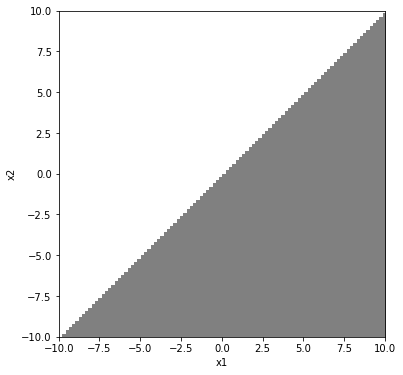

In [28]:
def plot_model(model, xlim=(-10,10), ylim=(-10,10), retstep=100):
    # Visualize (x1,x2)
    fig = plt.figure(figsize=(6,6))
    subplot = fig.add_subplot(1,1,1)
    subplot.set_xlabel('x1')
    subplot.set_ylabel('x2')
    subplot.set_xlim(xlim)
    subplot.set_ylim(ylim)

    # Draw
    field = [[ model( np.array([x1,x2]))
              for x1 in np.linspace(xlim[0], xlim[1] ,retstep)]
              for x2 in np.linspace(ylim[0], ylim[1] ,retstep)]
    subplot.imshow(field, origin='lower', extent=(xlim[0], xlim[1], ylim[0], ylim[1]),
                   cmap=plt.cm.gray_r, alpha=0.5)

plot_model(model)

This neuron acts as a simple binary classifier, whether a data satisfy the condition (x1>x2). Lets try to formulize above neuron mathematically, so that we can expand this perceptron to form a more complex network.

$$
f(\vec{x}) = w_0 + w_1x_1 + w_2x_2 \\
= w_0 + \vec{w} \cdot \vec{x} \\
H(n)=\begin{cases} 0, & n < 0, \\ 1, & n \ge 0, \end{cases},\quad \text{Heaviside Function} \\
N(\vec{x}) = H(f(\vec{x}))
$$



### Soft-Classifier

It is possible to make more 'soft' classifier by changing activation function. Below is another example of using sigmoid function. Details on the activation function will be covered in separate note.

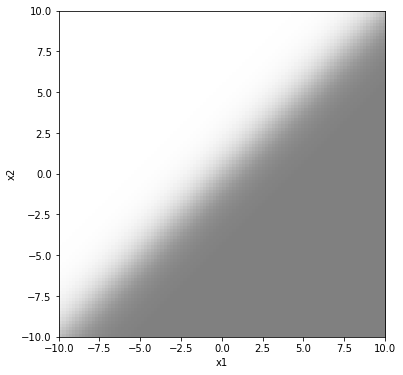

In [30]:
# Neuron with Sigmoid
def neuron_sigmoid(x, w, threshold = 0, bias = 0):
    activation = lambda t: 1/(1+np.exp(-t))
    s = np.dot(x,w) + bias
    return activation(s)
model = lambda x : neuron_sigmoid(x,w)
plot_model(model)

## 2-Layered Artificial Neural Network

![2 Layered ANN](./images/doublelayerANN_sketch.png)

In this section, lets consider stacking multiple layers of neuron, and understand what it does to the classification model. For simplicity, lets feed the input into two individual neurons, 

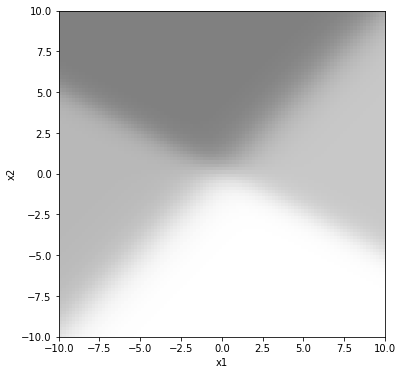

In [31]:
# Define Network
w1 = np.array([1,-1])
w2 = np.array([1,2])
w3 = np.array([-1,0.8])

def double_layer_model(x):
    hidden1 = neuron_sigmoid(x,w1, bias=0.3)
    hidden2 = neuron_sigmoid(x,w2, bias=-0.3)
    return neuron_sigmoid(np.array([hidden1, hidden2]), w3)

plot_model(double_layer_model)